This notebook builds ontoo the previous one by trying out this workflow but with only comments of 100-300 words, to see how that works on things.

This notebook also wants to further improve the sentiment analysis, so will try to use ScatterText and DeepMoji maybe

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

In [2]:
review_json_path = 'Books_5.json'

size = 1000000
review = pd.read_json(review_json_path, lines=True,
                      chunksize=size)



In [3]:
for chunk_review in review:
    sample_list = pd.DataFrame(chunk_review[['reviewerID','asin','overall']])
    
    print('run')


run


KeyboardInterrupt: 

In [4]:
chunk_review.sample(30)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
745401,3,False,"07 10, 2009",A41MKHZQ85J9U,0060727586,{'Format:': ' Hardcover'},Gr8ful,I enjoyed the beginning of this book... the ch...,"Potentially, a good action movie",1247184000,4,NaN
657120,1,False,"06 16, 2003",A2JFMJK5U5WFM8,0060530669,{'Format:': ' Hardcover'},J. Balash,Never use one word when ten will do. Very ped...,Too verbose; his editor must have been on vaca...,1055721600,5,NaN
635501,3,True,"11 3, 2006",A36IQ00KG1309U,0060507152,{'Format:': ' Hardcover'},Writer Mom,I bought this book for a book study group and ...,Slow start; a bit repetitive,1162512000,11,NaN
813229,4,False,"10 17, 2003",AF85LFTYD35E2,0060878193,{'Format:': ' Mass Market Paperback'},Amazon Customer,Very modern gothic. The atmosphere was perfect...,For lovers of the gothic genre,1066348800,7,NaN
838715,5,True,"06 28, 2015",A2K9TZQGIIWD08,0060935456,{'Format:': ' MP3 CD'},Kindle Customer,Another classic I put off reading for way to l...,Stories For All Ages,1435449600,NaN,NaN
393521,2,True,"05 31, 2016",A16AWFTKKGB8TR,0007925565,{'Format:': ' Kindle Edition'},TIMMY,This was the most difficult book I have ever read,Two Stars,1464652800,2,NaN
521397,4,True,"10 13, 2012",A3EUDNKNGYGMZ1,0060082186,{'Format:': ' Kindle Edition'},Terry A.,"Raylan cannot be better, truly wonderful chara...",Another Leonard Classic,1350086400,NaN,NaN
13778,4,True,"01 20, 2014",A3F67YZNFDY6YI,0001846590,{'Format:': ' Kindle Edition'},SFA,The language is probably a bit old fashioned f...,A beautiful fairy tale,1390176000,NaN,NaN
943862,5,True,"03 25, 2014",A3O4G8Q3MWHILX,0061350249,{'Format:': ' Hardcover'},Rick Grimes,I have never seen a book like this one. While ...,Amazing Book,1395705600,NaN,NaN
960731,2,False,"10 26, 2013",A2EPU0P84AI5T0,0061458570,{'Format:': ' Kindle Edition'},Melvin C. Vanderbrug,Disappointing to say the least. For Lionel Sh...,"Not her Best - by a long, long shot",1382745600,NaN,NaN


In [5]:
reviews = chunk_review[['reviewerID','asin','reviewText','overall']]

In [6]:
reviews.dtypes

reviewerID    object
asin          object
reviewText    object
overall        int64
dtype: object

In [7]:
reviews['reviewText'] = reviews['reviewText'].astype('str')

<ipython-input-7-2ee76be66918>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['reviewText'] = reviews['reviewText'].astype('str')


In [8]:
reviews['reviewLen'] = reviews['reviewText'].str.split().map(lambda x: len(x))


<ipython-input-8-2767d6b8146a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['reviewLen'] = reviews['reviewText'].str.split().map(lambda x: len(x))


In [9]:
reviews.head(10)

,reviewerID,asin,reviewText,overall,reviewLen
0,A1REUF3A1YCPHM,0001713353,"The King, the Mice and the Cheese by Nancy Gur...",5,162
1,AVP0HXC9FG790,0001713353,The kids loved it!,5,4
2,A324TTUBKTN73A,0001713353,My students (3 & 4 year olds) loved this book!...,5,16
3,A2RE7WG349NV5D,0001713353,LOVE IT,5,2
4,A32B7QIUDQCD0E,0001713353,Great!,5,1
5,A3H9YD6K9TVKDP,0001713353,Over and over the king has problems. Fortunat...,5,135
6,A3M314LI9OYME,0001713353,I remember reading my parents' copy of this bo...,5,72
7,A1YDQQJDRHM0FJ,0001713353,I am very happy with the book!!! It is one of...,5,25
8,AHXMDCU0N15TN,0001713353,"My copy is so tattered, worn and so loved. A ...",5,28
9,A2M46WTE5TR5WN,0001713353,This was one of my favorites when I was a smal...,5,27


In [10]:
reviews = reviews.loc[(reviews['reviewLen'] > 100) & (reviews['reviewLen'] < 300)]

reviews

,reviewerID,asin,reviewText,overall,reviewLen
0,A1REUF3A1YCPHM,0001713353,"The King, the Mice and the Cheese by Nancy Gur...",5,162
5,A3H9YD6K9TVKDP,0001713353,Over and over the king has problems. Fortunat...,5,135
15,A1SDAYRVRR62ZH,0001713353,"To summarize the story, it's all about trying ...",5,124
18,A2LGACKSC0MALY,0001061240,My aunt bought me this book in 1962 - I was te...,5,143
24,AOSS6RJIPV8WS,0001061240,I don't know that I can truly explain why I li...,5,152
...,...,...,...,...,...
999975,AV44NCH7K65PC,0061697699,It is clear that co-author Dr. Lilian Cheung i...,3,147
999979,AJ9AE2BVND0GS,0061706353,I've read several bland HR books lately so I w...,5,176
999989,AF42M7VGJ15FA,0061706353,The premise intrigued me and the author didn't...,5,138
999992,A1EQZYOONQFLBX,0061709565,"So, book 2. This time around we focus on Linds...",4,129


Got my starting dataframe with the reviews. Should filter them a bit before I work on them. After I filter out some comments, I will need to do a couple things:

1. Processing, tokenizing, stemming, leminization, those kind of word processing things. Can remove some of the noisy irrelevant stuff

2. Try out the different sentiment analysis packages

3. Other NLP techniques? Don't know

4. Iterate on these

Let's try out Vader first to see how it performs. Since I used this before, just to get a first stab at it.

In [11]:
reviews_samp = reviews.sample(500)

reviews_samp

,reviewerID,asin,reviewText,overall,reviewLen
942659,A3M19SFODHPO4J,0061338176,I have used the Collins-Robert French dictiona...,1,123
829306,A3AYGXMH34R18Y,0060913614,"The Bradford books, Red Sky at Morning and So ...",4,138
723990,A3SC3VBYZG3SSF,0060600640,In most books on the Dead Sea Scrolls (like th...,5,105
61166,A2QO08DN1DTEWD,0006280544,The breadth and scope of this book are truly s...,5,161
918034,A3RYZJWR8DBQRB,0061243582,"My son is only 3, but I love this book. It ha...",5,137
...,...,...,...,...,...
638616,A2MP9BX0ERKTXP,0060391448,I suppose that if I was going to take a famous...,4,268
982716,AV4ZB2IRXA0S9,0061491888,I'm not going to go over the plot of this book...,5,248
141693,A29FVCD89QLNB,0007177437,This story really took me to a new place. Neve...,4,190
424330,A38UM8YEDZWPN7,0008146594,"One of America's best, well-loved literary ico...",5,173


In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()


In [13]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score


In [14]:
def create_sentiments_vader(reviews):

    reviews['text_sentiment'] = reviews['reviewText'].apply(sentiment_analyzer_scores)

    reviews['compound'] = [d.get('compound') for d in reviews['text_sentiment']]
    reviews['neg'] = [d.get('neg') for d in reviews['text_sentiment']]
    reviews['neu'] = [d.get('neu') for d in reviews['text_sentiment']]
    reviews['pos'] = [d.get('pos') for d in reviews['text_sentiment']]
    
    return reviews


In [15]:
reviews_samp_sent = create_sentiments_vader(reviews_samp)

reviews_samp_sent

,reviewerID,asin,reviewText,overall,reviewLen,text_sentiment,compound,neg,neu,pos
942659,A3M19SFODHPO4J,0061338176,I have used the Collins-Robert French dictiona...,1,123,"{'neg': 0.021, 'neu': 0.904, 'pos': 0.075, 'co...",0.7924,0.021,0.904,0.075
829306,A3AYGXMH34R18Y,0060913614,"The Bradford books, Red Sky at Morning and So ...",4,138,"{'neg': 0.019, 'neu': 0.735, 'pos': 0.246, 'co...",0.9869,0.019,0.735,0.246
723990,A3SC3VBYZG3SSF,0060600640,In most books on the Dead Sea Scrolls (like th...,5,105,"{'neg': 0.136, 'neu': 0.767, 'pos': 0.096, 'co...",-0.7910,0.136,0.767,0.096
61166,A2QO08DN1DTEWD,0006280544,The breadth and scope of this book are truly s...,5,161,"{'neg': 0.009, 'neu': 0.81, 'pos': 0.181, 'com...",0.9845,0.009,0.810,0.181
918034,A3RYZJWR8DBQRB,0061243582,"My son is only 3, but I love this book. It ha...",5,137,"{'neg': 0.041, 'neu': 0.762, 'pos': 0.198, 'co...",0.9820,0.041,0.762,0.198
...,...,...,...,...,...,...,...,...,...,...
638616,A2MP9BX0ERKTXP,0060391448,I suppose that if I was going to take a famous...,4,268,"{'neg': 0.121, 'neu': 0.777, 'pos': 0.101, 'co...",-0.7413,0.121,0.777,0.101
982716,AV4ZB2IRXA0S9,0061491888,I'm not going to go over the plot of this book...,5,248,"{'neg': 0.104, 'neu': 0.664, 'pos': 0.232, 'co...",0.9916,0.104,0.664,0.232
141693,A29FVCD89QLNB,0007177437,This story really took me to a new place. Neve...,4,190,"{'neg': 0.046, 'neu': 0.869, 'pos': 0.085, 'co...",0.8477,0.046,0.869,0.085
424330,A38UM8YEDZWPN7,0008146594,"One of America's best, well-loved literary ico...",5,173,"{'neg': 0.043, 'neu': 0.875, 'pos': 0.082, 'co...",0.7580,0.043,0.875,0.082


Seems a little iffy on first pass. Should kind of check more. Let's try textblob package

In [16]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

reviews_samp_sent['polarity'] = reviews_samp_sent['reviewText'].apply(pol)
reviews_samp_sent['subjectivity'] = reviews_samp_sent['reviewText'].apply(sub)
reviews_samp_sent

,reviewerID,asin,reviewText,overall,reviewLen,text_sentiment,compound,neg,neu,pos,polarity,subjectivity
942659,A3M19SFODHPO4J,0061338176,I have used the Collins-Robert French dictiona...,1,123,"{'neg': 0.021, 'neu': 0.904, 'pos': 0.075, 'co...",0.7924,0.021,0.904,0.075,0.165006,0.385220
829306,A3AYGXMH34R18Y,0060913614,"The Bradford books, Red Sky at Morning and So ...",4,138,"{'neg': 0.019, 'neu': 0.735, 'pos': 0.246, 'co...",0.9869,0.019,0.735,0.246,0.220803,0.431016
723990,A3SC3VBYZG3SSF,0060600640,In most books on the Dead Sea Scrolls (like th...,5,105,"{'neg': 0.136, 'neu': 0.767, 'pos': 0.096, 'co...",-0.7910,0.136,0.767,0.096,0.106960,0.387729
61166,A2QO08DN1DTEWD,0006280544,The breadth and scope of this book are truly s...,5,161,"{'neg': 0.009, 'neu': 0.81, 'pos': 0.181, 'com...",0.9845,0.009,0.810,0.181,0.132348,0.517273
918034,A3RYZJWR8DBQRB,0061243582,"My son is only 3, but I love this book. It ha...",5,137,"{'neg': 0.041, 'neu': 0.762, 'pos': 0.198, 'co...",0.9820,0.041,0.762,0.198,0.192083,0.524583
...,...,...,...,...,...,...,...,...,...,...,...,...
638616,A2MP9BX0ERKTXP,0060391448,I suppose that if I was going to take a famous...,4,268,"{'neg': 0.121, 'neu': 0.777, 'pos': 0.101, 'co...",-0.7413,0.121,0.777,0.101,0.068472,0.604583
982716,AV4ZB2IRXA0S9,0061491888,I'm not going to go over the plot of this book...,5,248,"{'neg': 0.104, 'neu': 0.664, 'pos': 0.232, 'co...",0.9916,0.104,0.664,0.232,0.034568,0.524383
141693,A29FVCD89QLNB,0007177437,This story really took me to a new place. Neve...,4,190,"{'neg': 0.046, 'neu': 0.869, 'pos': 0.085, 'co...",0.8477,0.046,0.869,0.085,0.114413,0.421714
424330,A38UM8YEDZWPN7,0008146594,"One of America's best, well-loved literary ico...",5,173,"{'neg': 0.043, 'neu': 0.875, 'pos': 0.082, 'co...",0.7580,0.043,0.875,0.082,0.199621,0.369372


Seems quite iffy too, and results are quite different from Vader it seems. Definetely need to try out processing of text. Let's try flair first, since it seems to work fairly well

In [24]:
from flair.models import TextClassifier
from flair.data import Sentence
import re

def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

sia = TextClassifier.load('en-sentiment')
def flair_prediction(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    score = str(sentence.labels[0])
    score = score.replace('(',' ').replace(')',' ')
    number = [float(s) for s in score.split() if isfloat(s) is True]
    
    if "POSITIVE" in score:
        return number[0]
    elif "NEGATIVE" in score:
        return -number[0]

2021-11-23 16:21:46,077 loading file C:\Users\kenhu\.flair\models\sentiment-en-mix-distillbert_4.pt


In [25]:
from sklearn.preprocessing import MinMaxScaler

reviews_samp_sent["flair_sentiment"] = reviews_samp_sent["reviewText"].apply(flair_prediction)
scaler = MinMaxScaler()

reviews_samp_sent['flair_scaled'] = scaler.fit_transform(reviews_samp_sent[["flair_sentiment"]])
reviews_samp_sent.head(30)

,reviewerID,asin,reviewText,overall,reviewLen,text_sentiment,compound,neg,neu,pos,polarity,subjectivity,flair_sentiment,flair_scaled
942659,A3M19SFODHPO4J,0061338176,I have used the Collins-Robert French dictiona...,1,123,"{'neg': 0.021, 'neu': 0.904, 'pos': 0.075, 'co...",0.7924,0.021,0.904,0.075,0.165006,0.385220,0.9991,0.99955
829306,A3AYGXMH34R18Y,0060913614,"The Bradford books, Red Sky at Morning and So ...",4,138,"{'neg': 0.019, 'neu': 0.735, 'pos': 0.246, 'co...",0.9869,0.019,0.735,0.246,0.220803,0.431016,0.9991,0.99955
723990,A3SC3VBYZG3SSF,0060600640,In most books on the Dead Sea Scrolls (like th...,5,105,"{'neg': 0.136, 'neu': 0.767, 'pos': 0.096, 'co...",-0.7910,0.136,0.767,0.096,0.106960,0.387729,0.9996,0.99980
61166,A2QO08DN1DTEWD,0006280544,The breadth and scope of this book are truly s...,5,161,"{'neg': 0.009, 'neu': 0.81, 'pos': 0.181, 'com...",0.9845,0.009,0.810,0.181,0.132348,0.517273,0.9999,0.99995
918034,A3RYZJWR8DBQRB,0061243582,"My son is only 3, but I love this book. It ha...",5,137,"{'neg': 0.041, 'neu': 0.762, 'pos': 0.198, 'co...",0.9820,0.041,0.762,0.198,0.192083,0.524583,0.9973,0.99865
166348,AL0U335GC9VUN,0007196121,I am a solid Robin Hobb fan and was thrilled w...,3,242,"{'neg': 0.097, 'neu': 0.848, 'pos': 0.055, 'co...",-0.8811,0.097,0.848,0.055,0.198782,0.475406,0.8000,0.90000
928181,A1MV7V2HX2PE6Z,0061238783,This was the first book I read by Christopher ...,5,267,"{'neg': 0.043, 'neu': 0.78, 'pos': 0.177, 'com...",0.9886,0.043,0.780,0.177,0.177710,0.574661,0.9998,0.99990
224042,A4W4WAIHKYF0N,000720924X,"I really enjoyed the first 60% of this book, w...",3,109,"{'neg': 0.02, 'neu': 0.722, 'pos': 0.259, 'com...",0.9851,0.020,0.722,0.259,0.406296,0.597222,0.6728,0.83640
292505,A1YXTS3LKHACZX,0007444117,"After reading Allegiant, I wished I'd never bo...",1,161,"{'neg': 0.086, 'neu': 0.776, 'pos': 0.138, 'co...",0.8313,0.086,0.776,0.138,0.041190,0.540357,-1.0000,0.00000
854492,AK9Q7JLFPP3BJ,0061001783,This was the first book that I read by Georget...,5,137,"{'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'comp...",0.9888,0.000,0.713,0.287,0.400984,0.586742,0.9997,0.99985


This is really troublesome flair sentinment rating. Need to transform it. So will try a few transformations out here.

- First gonna try an evenly spaced out flair rating, see if that works.



In [47]:
review_transform = reviews_samp_sent[['overall','flair_sentiment']]

In [48]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, FunctionTransformer

In [49]:
pt = PowerTransformer()

review_transform['flair_power'] = pt.fit_transform(X = review_transform[['flair_sentiment']])

review_transform

<ipython-input-49-e6efefd4a7c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_transform['flair_power'] = pt.fit_transform(X = review_transform[['flair_sentiment']])


,overall,flair_sentiment,flair_power
942659,1,0.9991,0.738272
829306,4,0.9991,0.738272
723990,5,0.9996,0.739467
61166,5,0.9999,0.740184
918034,5,0.9973,0.733974
...,...,...,...
638616,4,0.8546,0.410064
982716,5,0.9906,0.718024
141693,4,0.9794,0.691525
424330,5,0.9995,0.739228


In [51]:
qt = QuantileTransformer()

review_transform['flair_quantile'] = qt.fit_transform(X = review_transform[['flair_sentiment']])

review_transform

C:\Users\kenhu\anaconda3\envs\torch1\lib\site-packages\sklearn\preprocessing\_data.py:2588: UserWarning: n_quantiles (1000) is greater than the total number of samples (500). n_quantiles is set to n_samples.
  warnings.warn(
<ipython-input-51-0c00a5428513>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_transform['flair_quantile'] = qt.fit_transform(X = review_transform[['flair_sentiment']])


,overall,flair_sentiment,flair_power,flair_quantile
942659,1,0.9991,0.738272,0.673347
829306,4,0.9991,0.738272,0.673347
723990,5,0.9996,0.739467,0.759519
61166,5,0.9999,0.740184,0.927856
918034,5,0.9973,0.733974,0.555110
...,...,...,...,...
638616,4,0.8546,0.410064,0.364729
982716,5,0.9906,0.718024,0.464930
141693,4,0.9794,0.691525,0.418838
424330,5,0.9995,0.739228,0.739479


In [53]:
qt = QuantileTransformer(output_distribution = 'normal')

review_transform['flair_quantile_normal'] = qt.fit_transform(X = review_transform[['flair_sentiment']])

review_transform

C:\Users\kenhu\anaconda3\envs\torch1\lib\site-packages\sklearn\preprocessing\_data.py:2588: UserWarning: n_quantiles (1000) is greater than the total number of samples (500). n_quantiles is set to n_samples.
  warnings.warn(
<ipython-input-53-7c1abe4ebd56>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_transform['flair_quantile_normal'] = qt.fit_transform(X = review_transform[['flair_sentiment']])


,overall,flair_sentiment,flair_power,flair_quantile,flair_quantile_normal
942659,1,0.9991,0.738272,0.673347,0.449173
829306,4,0.9991,0.738272,0.673347,0.449173
723990,5,0.9996,0.739467,0.759519,0.704756
61166,5,0.9999,0.740184,0.927856,1.460005
918034,5,0.9973,0.733974,0.555110,0.138583
...,...,...,...,...,...
638616,4,0.8546,0.410064,0.364729,-0.345845
982716,5,0.9906,0.718024,0.464930,-0.088021
141693,4,0.9794,0.691525,0.418838,-0.204868
424330,5,0.9995,0.739228,0.739479,0.641740


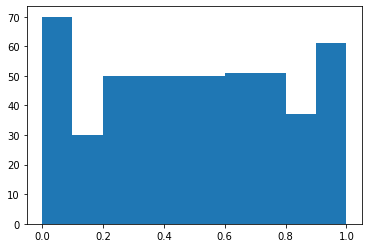

In [55]:
    import matplotlib.pyplot as plt

    plt.hist(review_transform['flair_quantile'])
    plt.show()

Need to smoooth out the curve a bit...

In [56]:
reviews_samp_sent.tail(40)

,reviewerID,asin,reviewText,overall,reviewLen,text_sentiment,compound,neg,neu,pos,polarity,subjectivity,flair_sentiment,flair_scaled
852901,A195QTF4JPPBOX,0060974060,After having read this book about 10-15 times ...,5,164,"{'neg': 0.056, 'neu': 0.807, 'pos': 0.137, 'co...",0.9339,0.056,0.807,0.137,0.074062,0.461181,0.9001,0.95005
644644,A22JVTI1W5HYU6,0060513535,"I had read all the books in this series, and e...",2,106,"{'neg': 0.05, 'neu': 0.854, 'pos': 0.096, 'com...",0.6652,0.050,0.854,0.096,0.065714,0.552857,-1.0000,0.00000
372721,A2405GFGP3NA4Z,0007554850,I loved reading this book. It not only is a go...,5,144,"{'neg': 0.061, 'neu': 0.734, 'pos': 0.204, 'co...",0.9788,0.061,0.734,0.204,0.164992,0.680719,0.9980,0.99900
750472,A1AGBTL8M08K4V,0060740221,"As Mr. Bryson points out, almost nothing is kn...",4,105,"{'neg': 0.018, 'neu': 0.905, 'pos': 0.078, 'co...",0.7742,0.018,0.905,0.078,0.379167,0.515278,0.9996,0.99980
627996,AXW1O6Q92XF0Z,0060393866,"In Jess Walter's debut novel, it looks like a ...",4,262,"{'neg': 0.087, 'neu': 0.761, 'pos': 0.152, 'co...",0.9524,0.087,0.761,0.152,0.090278,0.454330,0.9848,0.99240
584674,A3CFT5LHFCB46K,0060193484,This book covers every Simpson episode made th...,5,155,"{'neg': 0.103, 'neu': 0.824, 'pos': 0.073, 'co...",-0.7360,0.103,0.824,0.073,0.141346,0.476282,0.8236,0.91180
843492,A2H27QB13MDOLB,0060935936,"John Mc Whorter has written a biting, intense,...",4,197,"{'neg': 0.073, 'neu': 0.764, 'pos': 0.164, 'co...",0.9519,0.073,0.764,0.164,0.142507,0.450280,0.9998,0.99990
972273,AX68R3TJ3ZW2U,0061566136,"""...Killer, gets better. A is back and the cre...",3,123,"{'neg': 0.118, 'neu': 0.748, 'pos': 0.134, 'co...",0.3262,0.118,0.748,0.134,0.139352,0.389815,0.9969,0.99845
25825,A3B1HPMZDV0KVW,0001048767,"Shakespeare is not my favorite author, althoug...",4,104,"{'neg': 0.054, 'neu': 0.821, 'pos': 0.126, 'co...",0.8558,0.054,0.821,0.126,0.169242,0.546667,-0.9982,0.00090
185834,A14MQD9S4KD2H8,0007201966,Isabel Allende's Zorro is a fantastic novel. I...,5,104,"{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp...",0.9743,0.000,0.803,0.197,0.448333,0.706667,0.9996,0.99980


To better test out how this performs, let's sample one row and see how the scores are compared to the full text

In [22]:
samp_text = reviews_samp_sent.sample(1)
pd.set_option('display.max_colwidth', None)
print(samp_text['reviewText'])

print(samp_text)

118123    This book of epic scope and magnitude is J.R.R. Tolkien's flagship work. Tolkien's characterizations and descriptions are excellent, and his story stays tight and razor sharp to the very end. It is a lot to handle, its page count being close to 1,000, but it never loses its suspense and action. So much did I enjoy this book I read it twice, and many times have browsed its pages just for fun.\n  Of the three superb books, my favorite would have to be the third, The Return of the King. This is the place where all the unfolding action finally comes to a head. (I insist, however, that readers do not jump to this book before reading the other two.) Do NOT pass by this trilogy.
Name: reviewText, dtype: object
            reviewerID        asin  \
118123  A3DTUMLBZCG47D  000711835X   

                                                                                                                                                                                                        

In [23]:
import scattertext as st

In [25]:
reviews_sample = reviews_samp_sent.copy()

reviews_sample

,reviewerID,asin,reviewText,overall,reviewLen,text_sentiment,compound,neg,neu,pos,polarity,subjectivity,flair_sentiment,flair_scaled
81524,A3AG5QAT8L0I3R,0006480101,"I debated back and forth between 4 and 5 stars. I rated the first book 4 stars, but this one ended up engaging me more. Where the world and character building were heavily developed in the first book, this one pushed deeper toward the plot. The writing style is similar in that there is a heavy dose of narrative exposition mixed in with more active and gripping scenes. The modern reader might have some difficulty with this book; having developed an attention span corrupted by the entertainment industry. Its not super fluid and fast paced. Sometimes it bogs down before picking back up. And yet, for those who are patient enough they can come away with a solidly built world and well defined characters. More importantly, they can come away with a deeper and richer experience. I wonder sometimes that, if The Lord of the Ring had been released today, would it be considered a flop? With heavy exposition and info dumping, would it survive the modern critic? And yet, for those who have the patience, they are richly rewarded. While Robin Hobb isn't J.R.R. Tolkien, she does grasp many of the skills that enrich more than simply entertain. For this, I gladly give Royal Assassin 5-stars, and eagerly await reading the third and last book in this trilogy.",5,219,"{'neg': 0.062, 'neu': 0.779, 'pos': 0.16, 'compound': 0.9785}",0.9785,0.062,0.779,0.160,0.159983,0.429563,95169.984811,0.975850
303541,A1EVT922SA4UMS,0007447868,"Shame about Martin, when he started the series it had such promise. This book was, as he admits on his website, only half of a book and to add insult to injury he wants his fans to stop bugging him because he will finish the other half when he gets round to it. Since his last update on his own site was January 2008 when he said that he had no idea when the next volume, which will bring the series about half way would be finished, I would not hold my breath. Personally I shall be boycotting his books in future.",1,102,"{'neg': 0.142, 'neu': 0.819, 'pos': 0.039, 'compound': -0.8957}",-0.8957,0.142,0.819,0.039,-0.001923,0.335897,-100000.000000,0.000000
280904,A2IX24RC2OV957,0007452969,"Another great Sharpe book.\nThis is one of my favourites, the book has everything, Sharpe has to deal with lots of things at once, he has his love life to think about, his company, his enemy Hakeswill an a new edition to the Sharpe family.\nHakeswill is one of the best characters in Sharpe, his insanity is captivating. I hope to see more of Hakeswill in future Cornwell books, though am sure soon the character will become old and tired and have to be killed off. Robert Knowles is back, its nice to see some previous characters, and to see how they have developed.\nThe book is based around the siege of Badajoz, a bloody battle with an infamous ending. As with all Sharpe books you get an insight into the history of the British army, its refreshing to get an insight into the British army back in the 1800's that not from Hollywood (the murderous soldiers in the patriot etc...). The British army prevented the world becoming one big French Empire in a campaign that today is largely forgotten. Many people talk of Napoleon as the greatest military tactician of his time, but many people don't remember how Lord Wellington beat he and his marshal's. This series of books really brings that great part of British history home.\nA great installment of Sharpe",5,224,"{'neg': 0.068, 'neu': 0.818, 'pos': 0.114, 'compound': 0.9259}",0.9259,0.068,0.818,0.114,0.221588,0.443049,99426.007395,0.997130
328328,A3DR4CQF3MMTZM,0007456719,"In the past few months I have read many dystopian novels. Our society is quickly headed down a road that is going to lead to disaster unless we stand up and force changes. In light of this, I find it very interesting to see how different authors see what the future holds, not onl

In [26]:
reviews_sample['Liked'] = reviews_sample.overall.apply(lambda x: x > 3).map({True: 'Liked', False: 'Not Liked'})

reviews_sample['Liked']

81524         Liked
303541    Not Liked
280904        Liked
328328        Liked
409049        Liked
            ...    
987460        Liked
207409        Liked
326850    Not Liked
332372        Liked
881805        Liked
Name: Liked, Length: 500, dtype: object

In [27]:
corpus = st.CorpusFromPandas(
    reviews_sample,
    category_col = 'Liked',
    text_col = 'reviewText',
    nlp=st.whitespace_nlp_with_sentences
).build()


In [28]:
html = st.produce_scattertext_explorer(
        corpus,
        category="Liked",
        category_name='Liked',
        not_category_name='Not Liked',
        minimum_term_frequency=10,
        pmi_threshold_coefficient=5,
        width_in_pixels=1000,
        metadata=reviews_sample['asin']
        )


In [35]:
open('reviews_scatter.html', 'wb').write(html.encode('utf-8'));

Scatterplot is pretty neat, let's see if it holds for the Flair Data lol.

In [36]:
reviews_sample['Liked'] = reviews_sample.flair_scaled.apply(lambda x: x > 0.5).map({True: 'Liked', False: 'Not Liked'})

reviews_sample['Liked']

81524         Liked
303541    Not Liked
280904        Liked
328328        Liked
409049        Liked
            ...    
987460        Liked
207409        Liked
326850    Not Liked
332372        Liked
881805        Liked
Name: Liked, Length: 500, dtype: object

In [37]:
corpus = st.CorpusFromPandas(
    reviews_sample,
    category_col = 'Liked',
    text_col = 'reviewText',
    nlp=st.whitespace_nlp_with_sentences
).build()


In [38]:
html = st.produce_scattertext_explorer(
        corpus,
        category="Liked",
        category_name='Liked',
        not_category_name='Not Liked',
        minimum_term_frequency=10,
        pmi_threshold_coefficient=5,
        width_in_pixels=1000,
        metadata=reviews_sample['asin']
        )


In [39]:
open('reviews_scatter_flair.html', 'wb').write(html.encode('utf-8'));